In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import os

from astropy.cosmology import Planck15 as cosmo_astropy
from astropy import units as u
import camb
from cosmology import Cosmology
import glass
import glass.ext.camb
import h5py

import sys
sys.path.append('../code')
import plotter
import utils
import make_mocks as mm

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Load tracer samples

In [9]:
ratio = 100
seed = 42
tag_mock = f'_ratioNgalNagn{ratio:d}'

output_dir = '../data/mocks_glass'
fn_mock = os.path.join(output_dir, f'mock_catalog_seed{seed}{tag_mock}.hdf5')

In [10]:
ra_gal, dec_gal, z_gal, ra_agn, dec_agn, z_agn, attrs = mm.load_mock_catalog(fn_mock)

# Plot tracer sample properties


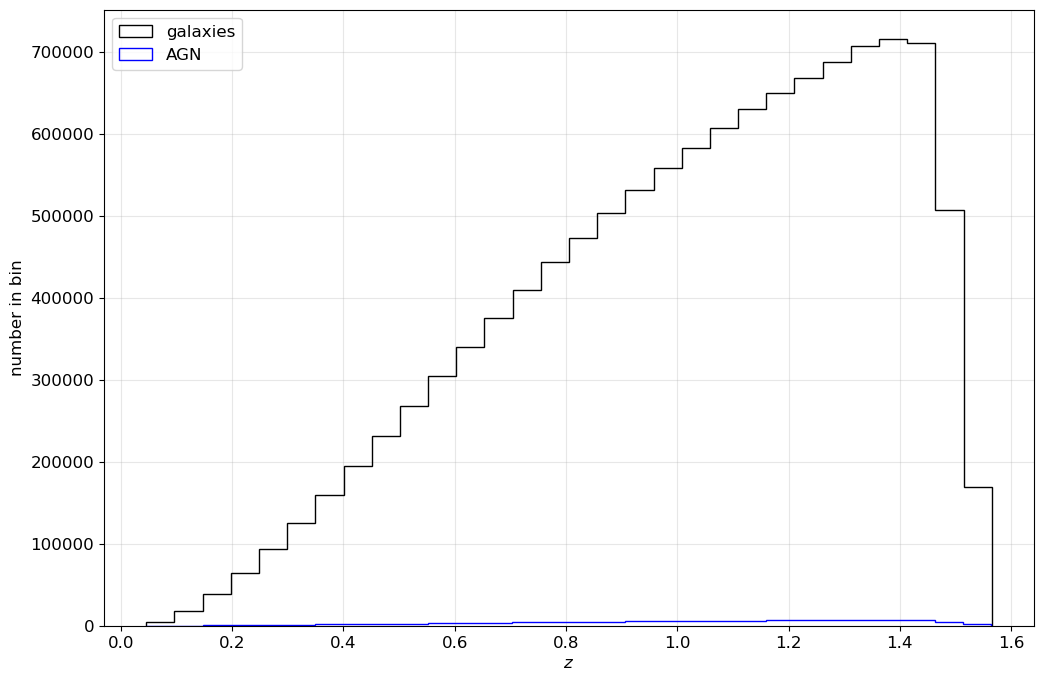

In [11]:
bins = 30
plt.hist(z_gal, label='galaxies', color='black', density=False, bins=bins, histtype='step')
plt.hist(z_agn, label='AGN', color='blue', density=False, bins=bins, histtype='step')
plt.xlabel(r'$z$')
plt.ylabel('number in bin')
plt.legend()
plt.show()

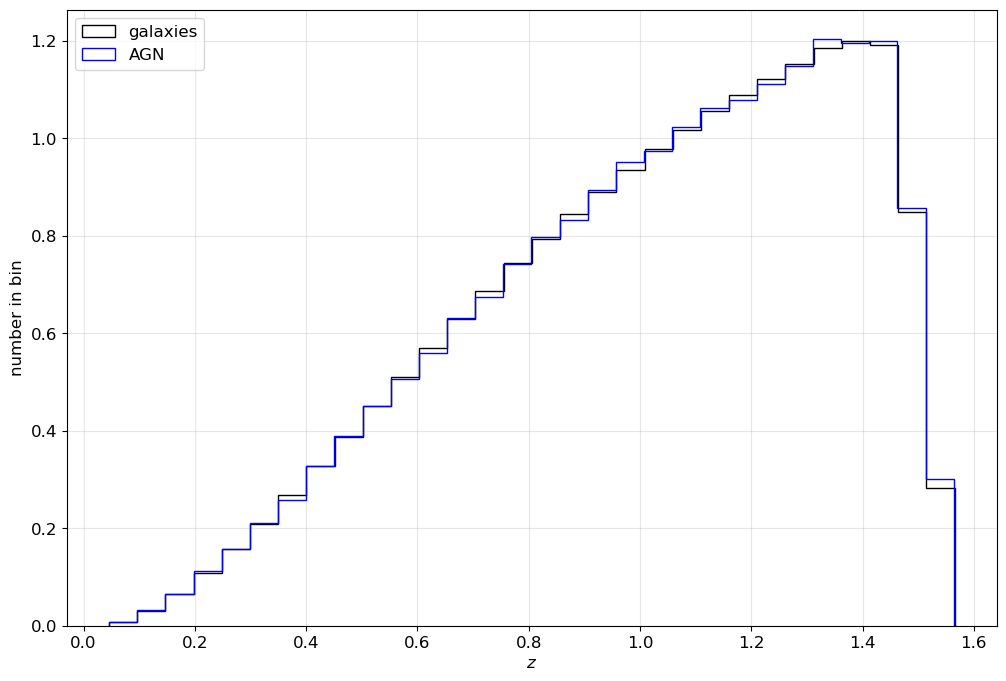

In [12]:
bins = 30
plt.hist(z_gal, label='galaxies', color='black', density=True, bins=bins, histtype='step')
plt.hist(z_agn, label='AGN', color='blue', density=True, bins=bins, histtype='step')
plt.xlabel(r'$z$')
plt.ylabel('number in bin')
plt.legend()
plt.show()

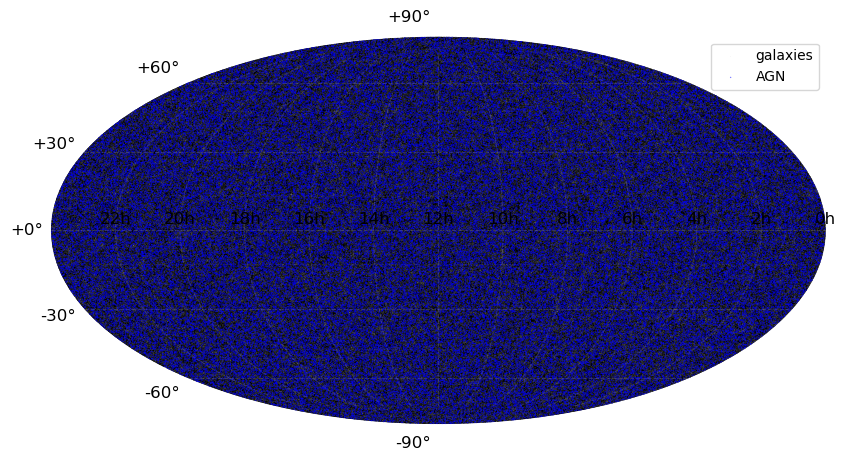

In [13]:
ra_arr = [ra_gal, ra_agn]
dec_arr = [dec_gal, dec_agn]

c_arr = ['k', 'b']
alpha_arr = [0.1, 0.5]

s_arr = [0.2, 1]
label_arr = ['galaxies', 'AGN']

plotter.create_skyplot(ra_arr, dec_arr, alpha_arr=alpha_arr, s_arr=s_arr, c_arr=c_arr, label_arr=label_arr)
plt.show()

# GW sources

In [14]:
f_agn = 0.25
N_gw = 1000
gw_seed = seed + 1000  # Will use catalog seed + 1000

base_name = os.path.splitext(os.path.basename(fn_mock))[0]
tag_gw = f'_fagn{f_agn}_N{N_gw}_seed{gw_seed}'
fn_gw = os.path.join(output_dir, f'{base_name}_gws{tag_gw}.hdf5')

In [15]:
i_gw_gal, i_gw_agn, attrs = mm.load_gw_injection(fn_gw)

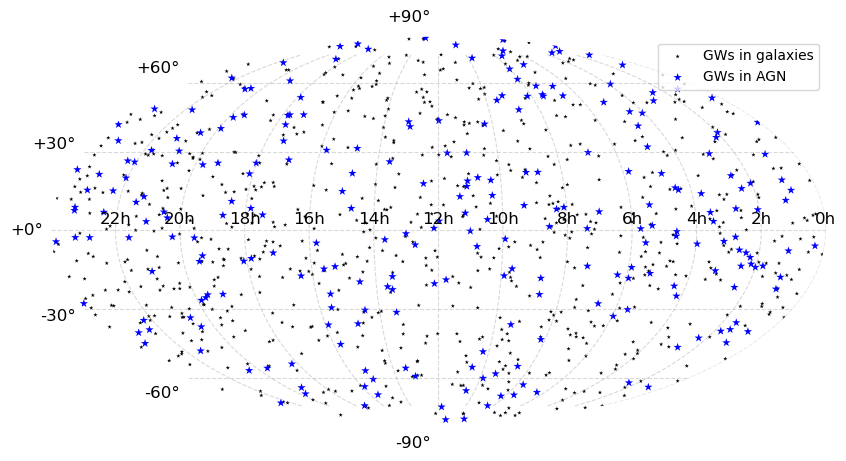

In [16]:
ra_gw_arr = [ra_gal[i_gw_gal], ra_agn[i_gw_agn]]
dec_gw_arr = [dec_gal[i_gw_gal], dec_agn[i_gw_agn]]
z_gw_arr = [z_gal[i_gw_gal], z_agn[i_gw_agn]]

c_arr = ['k', 'b']
alpha_arr = [1, 1]
s_arr = [10, 40]

label_arr = ['GWs in galaxies', 'GWs in AGN']
marker_arr = ['*', '*']

plotter.create_skyplot(ra_gw_arr, dec_gw_arr, alpha_arr=alpha_arr, s_arr=s_arr, 
                       c_arr=c_arr, label_arr=label_arr, marker_arr=marker_arr)
plt.show()

# investigate dep on N and f

In [54]:
N_gal = 10000
ratio_agn_arr = [1e-3, 1e-2, 1e-1, 1.0]
#lambda_agn_arr = [0, 0.25, 0.5, 0.75, 1.0]
lambda_agn_arr = [0, 0.25, 0.5, 0.75, 1.0]
#lambda_agn_arr = [0.0, 0.5]

#f_agn_arr = np.linspace(0.0, 1.01, 101)
n_f_bins = 100
bin_width = 1.0/n_f_bins
f_agn_arr = np.arange(0.0, 1.0+bin_width, bin_width)

# Create nested dictionary to store results for each ratio and lambda
frac_agn_dict = {}
for ratio_agn in ratio_agn_arr:
    N_agn = int(N_gal * ratio_agn)
    frac_agn_dict[ratio_agn] = {}
    
    for lambda_agn in lambda_agn_arr:
        frac_agn_arr = []
        
        for f_agn in f_agn_arr:
            # Use the utils function to compute fractions
            frac_gal, frac_agn = utils.compute_gw_host_fractions(N_gal, N_agn, f_agn, lambda_agn=lambda_agn)
            frac_agn_arr.append(frac_agn)
        
        frac_agn_dict[ratio_agn][lambda_agn] = np.array(frac_agn_arr)

Frac per object if f=0: 9.9900e-05
Frac gal: 1.0000
Frac agn: 0.0000
Frac agn disk: 0.0000
Frac agn field: 0.0000
Total fraction (should=1): 1.0000
Frac per object if f=0: 9.9900e-05
Frac gal: 0.9900
Frac agn: 0.0100
Frac agn disk: 0.0100
Frac agn field: 0.0000
Total fraction (should=1): 1.0000
Frac per object if f=0: 9.9900e-05
Frac gal: 0.9800
Frac agn: 0.0200
Frac agn disk: 0.0200
Frac agn field: 0.0000
Total fraction (should=1): 1.0000
Frac per object if f=0: 9.9900e-05
Frac gal: 0.9700
Frac agn: 0.0300
Frac agn disk: 0.0300
Frac agn field: 0.0000
Total fraction (should=1): 1.0000
Frac per object if f=0: 9.9900e-05
Frac gal: 0.9600
Frac agn: 0.0400
Frac agn disk: 0.0400
Frac agn field: 0.0000
Total fraction (should=1): 1.0000
Frac per object if f=0: 9.9900e-05
Frac gal: 0.9500
Frac agn: 0.0500
Frac agn disk: 0.0500
Frac agn field: 0.0000
Total fraction (should=1): 1.0000
Frac per object if f=0: 9.9900e-05
Frac gal: 0.9400
Frac agn: 0.0600
Frac agn disk: 0.0600
Frac agn field: 0.000

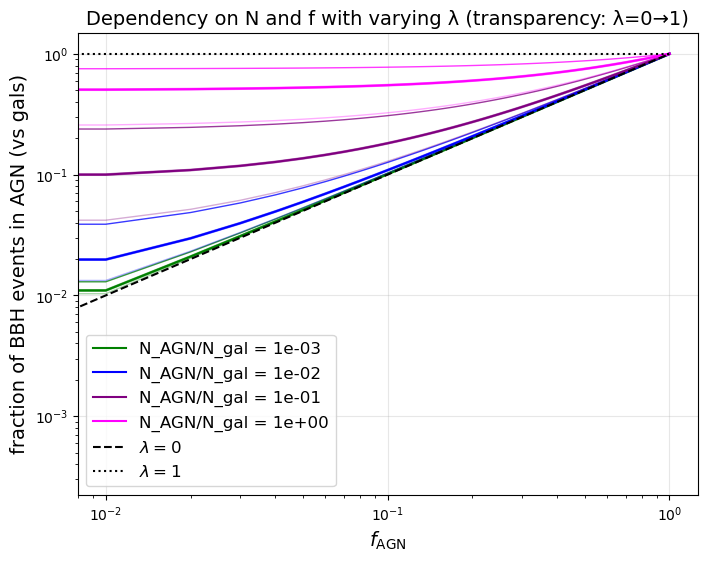

In [56]:
colors = ['green', 'blue', 'purple', 'magenta']
plt.figure(figsize=(8, 6))

# Create alpha values for transparency gradient (high lambda = high alpha)
alpha_values = np.linspace(0.1, 1.0, len(lambda_agn_arr))


for i, ratio_agn in enumerate(ratio_agn_arr):
    color = colors[i]
    
    for j, lambda_agn in enumerate(lambda_agn_arr):
        # Skip lambda=0 and lambda=1 as they're plotted above
        if lambda_agn in [0.0, 1.0]:
            continue
            
        alpha = alpha_values[j]
        
        # Set linewidth: lambda=0.5 gets width 1.5, others get width 0.5
        linewidth = 2 if lambda_agn == 0.5 else 1
        
        # Plot each lambda line with different transparency
        plt.loglog(f_agn_arr, frac_agn_dict[ratio_agn][lambda_agn], 
                 color=color, alpha=alpha, linewidth=linewidth)
    
    # Add a single label for each ratio (using the most opaque line)
    plt.loglog(f_agn_arr, frac_agn_dict[ratio_agn][0.5], 
             label=f'N_AGN/N_gal = {ratio_agn:.0e}',
             color=color, alpha=1.0, linewidth=1.5)


# Plot lambda=0 and lambda=1 lines (ratio doesn't matter, so use first ratio)
plt.loglog(f_agn_arr, frac_agn_dict[ratio_agn_arr[0]][0.0], 
         color='black', alpha=1.0, linewidth=1.5, linestyle='--', 
         label=r'$\lambda = 0$')
plt.loglog(f_agn_arr, frac_agn_dict[ratio_agn_arr[0]][1.0], 
         color='black', alpha=1.0, linewidth=1.5, linestyle=':', 
         label=r'$\lambda = 1$')

plt.xlabel(r'$f_{\rm AGN}$', fontsize=14)
plt.ylabel(r'fraction of BBH events in AGN (vs gals)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.title('Dependency on N and f with varying λ (transparency: λ=0→1)', fontsize=14)
plt.show()

## Testing lambda formulation

In [31]:
import utils

N_gal = 10
N_agn = 10
f_agn = 0.5

utils.compute_gw_host_fractions(N_gal, N_agn, f_agn, lambda_agn=0.5)

Frac per object if f=0: 5.0000e-02
Frac gal: 0.2500
Frac agn: 0.7500
Frac agn disk: 0.5000
Frac agn field: 0.2500
Total fraction (should=1): 1.0000


(0.25, 0.75)

In [23]:
import utils

N_gal = 1000
N_agn = 10
f_agn = 0.25

utils.compute_gw_host_fractions(N_gal, N_agn, f_agn, lambda_agn=0.9)

Frac per object if f=0: 9.9010e-04
Frac gal: 0.6881
Frac agn: 0.3119
Frac agn disk: 0.2500
Frac agn field: 0.0619
Total fraction (should=1): 1.0000


(0.6880733944954127, 0.3119266055045872)